<ipython-input-137-57b1f9e2dd55>:218: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sub_averages = strains['Sequence_ID', "Difference_Rate"].mean()


                                  Difference_Rate
Sequence_ID                                      
Alphacoronavirus_Bat-CoV/P               0.535392
Bat_Coronavirus                          0.538825
Bat_Coronavirus_BM48-31                  0.533776
Beluga_Whale_Coronavirus_SW1             0.554575
Betacoronavirus_England_1                0.554807
Betacoronavirus_HKU24_Strain_HKU         0.332224
Bovine_Coronavirus_Isolate_BCoV-         0.043547
Canada_Goose_Coronavirus_Strain_         0.524178
Common-moorhen_Coronavirus_HKU21         0.524273
Duck_Coronavirus_Isolate_DK/GD/2         0.543875
Feline_Infectious_Peritonitis_Vi         0.552989
Ferret_Coronavirus_Isolate_FRCoV         0.536565
Isolate_Camel_Aplhacoronavirus           0.532975
Lucheng_Rn_Rat_Coronavirus_Isola         0.556448
Magpie-robin_Coronavirus_HKU18           0.576065
Middle_East_Coronavirus_Isolate_         0.555209
Mink_Coronavirus_Strain_WD1127           0.538698
Munia_Coronavirus_HKU13-3514             0.566816


C:\Users\Jesse\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Jesse\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



Human_Coronavirus_OC43_Strain_AT -----TGTG------------------TTGCT--------------------------AG


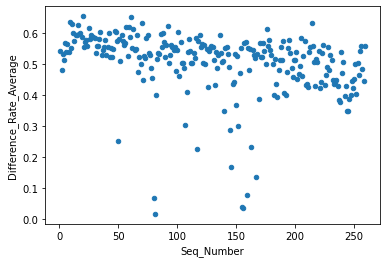

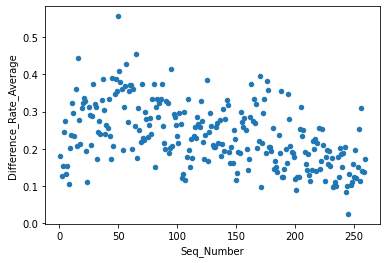

In [137]:
## Imports for data visualization
import pandas as pd

from pandas import read_csv

import csv

## For statistical testing
from scipy.stats import ttest_ind

class Phylogeny_Data():
    """This class hold information and lists of strain objects
    To represent the strains we are using in our phylogeny"""

    names = []
    
    ##Holds an aligned sequence file
    alignment_file = ""
    
    strains = []
    
    def __init__(self):
        """Creates a Phylogeny_Data obj
        Takes in self"""
    
        alignment_file = ""
        names = []
    
    def get_names(self):
        """Returns a list of names based on the current alignment_file
        Takes in self"""
    
        names = []
    
        file = open(self.alignment_file)
        
        for line in file:

            ##Split up into list of words
            words = line.split()
            
            if len(words) == 0:
                self.names = names
                file.close()
                return names
            else:
                ##take first word
                name = words[0]
                ##add to list
                names.append(name)
                
    def get_strains(self):
        """Returns a list of strain objects from our alignment data
        Takes in self"""
      
        for self.name in self.names:

            genome = Strain()
            genome.name = self.name
            genome.sequences = []
            
            file = open(self.alignment_file)
        
            for line in file:
                ##Split up into list of words
                words = line.split()
            
                if len(words) == 0:
                    continue
                elif words[0] == self.name:
                    genome.sequences.append(words[1])
                ## End of file
                elif words[0] == "end":
                    break
                    
            self.strains.append(genome)
    
        file.close()
        
        return self.strains
    
    def compare_seq(self, selected_strain, selected_sequence):
        """function takes in an object strain, and an int sequence (out of 519 sequences)
        compares selected sequence of strain to all other aligned sequences of other strains
        example parameter (Bat_Coronavirus, 342)
        return: a dict holding whats being compared to base as the key and its substitution rate as the value"""
        """example dict
        'Beluga_coronavirus_sequence_342', '3/60 substitutions took place with Bat_coronavirus_sequence_342'
        'Feline_coronavirus_sequence_233', '12/60 substitutions took place with Bat_coronavirus_sequence_233'
        """
        # if counting deletions
        total_comparisons = 60
    
        # if ignoring deletions, counter reset after each comparison
        non_deletion_comparisons = 0
    
        # number of nucleotide matches, reset after each comparison
        matches = 0
    
        # dict to hold compared strain and sequence as key, sub rate with selected strain as value
        substitution_rates = []
    
        # list to hold all aligned sequences of nth alignment to be compared relative to chosen strain
        alignments = []
        
        # String to hold all matches within a comparison ('*' means that the nucleotides did not match)
        matches_as_string = ""
    
        # grabbing selected sequence as bases of comparison
        selected_sequence_as_string = selected_strain.sequences[selected_sequence]
        
        # track what sequence name we are on
        strain_names = []

        """adding nth sequence alignment for all 30 strains to list including selected sequence. we will deal with 
        avoiding comparing sequence to itself below"""
        for element in self.strains:
            ## Don't go out of range 
            if selected_sequence > len(element.sequences) - 1:
                break
            ## Don't include if same as base strain
            if selected_strain.name == element.name:
                continue
                
            strain_names.append(element.name)
            
            alignments.append(element.sequences[selected_sequence])

        #set seq count
        seq_count = 0
    
        # iterating thru 30 selected sequences
        for seq in alignments:
            # reset count
            count = 0
            # reset match string
            matches_as_string = ""
            
            # do not compare if sequences are of the same strain
            if not seq == selected_sequence_as_string:
                # iterating through 60 char sequence, ignoring deletions, adding up matches
                for nucleotide in seq:
                    
                    if (count > len(selected_sequence_as_string) - 1):
                        break
                    
                    # check for deletion, add one if no deletion
                    if not nucleotide == "-" and not selected_sequence_as_string[count] == "-":
                        non_deletion_comparisons += 1
                        
                        ## check for match, add to count if so
                        if nucleotide == selected_sequence_as_string[count]:
                            matches += 1
                            
                            ##add to matches string
                            matches_as_string += selected_sequence_as_string[count]
                        else:
                            matches_as_string += "*"
                            
                        ## if deletion detected, continue
                    else:
                        ##add to matched string
                        matches_as_string += "-"
                        
                        # add to count
                        count += 1
                        
                        continue
                            
                    ## add to count
                    count += 1
                    
                """after each individual sequence comparison is made, add sub rate to dict, and reset num of match and 
                num of comparison counter for new sequence comparison"""
                non_matches = non_deletion_comparisons - matches
                non_matches_as_fraction = str(non_matches) + "/" + str(non_deletion_comparisons)
            
                ## ensure that we don't divide by zero
                if non_deletion_comparisons == 0:
                    sub_rate = 0.00
                else:
                    sub_rate = non_matches / non_deletion_comparisons
                
                value = sub_rate
                
                data = {"Sequence_ID": str(strain_names[seq_count]), 
                        "Difference_Rate" : value, "Matched_Nucleotides" : matches_as_string}
                
                ## Add dict to list
                substitution_rates.append(data)
                                          
                matches = 0
                non_deletion_comparisons = 0
                
                seq_count += 1
            
            else:
                
                seq_count += 1
                continue
        ## after all 29 strain sequences are compared to the selected strain sequence, return dict with sub rate info
        return substitution_rates
        
    def create_strain_average_table(self):
        """Returns nothing, displays a table of the substitution analysis results
        Takes in self"""
            
        ## Load the text version of the table (a csv file) into python using pandas
            
        feature_table = pd.read_csv("export_all.csv")
        
        ## Name columns
        feature_table.columns = ['Sequence_ID', "Difference_Rate", 'Matched_Nucleotides']

        strains = feature_table.groupby('Sequence_ID')

        ## Get the average of each strain (based on name/sequence ID)
        sub_averages = strains['Sequence_ID', "Difference_Rate"].mean()

        print(sub_averages)

        
    def create_data(self, strain_list, index):
        """returns an int reporting how many .csv files were made containing all 
        of the sequence comparisons for a given strain. The average is taken of all 
        of the strains sub_rates. Creates a .csv filed titled "export_all" containing all data
        Takes in self, a strain obj list, and an int of the index of the strain we want to
        compare all others to"""
        
        counter = 0
        
        data = []
        
        for seq in strain_list[index].sequences:
            # compare every seq of chosen strain
            data.extend(self.compare_seq(strain_list[index], counter))
            
            counter += 1
            
        ##explictly name columns
        col_name =["Sequence_ID","Difference_Rate", "Matched_Nucleotides"]
        
        # Write to exportfile based on counter
        with open("export_all.csv", 'w') as csvFile:
            wr = csv.DictWriter(csvFile, fieldnames = col_name, lineterminator = '\n')
            wr.writeheader()
            for element in data:
                wr.writerow(element)
                  
        return counter - 1
    
    def create_one_data_set(self, strain_list, index, seq_index):
        """returns nothing, creates a file titled export containing the info for
        one sequence comparison of a chosen base strain
        Takes in self, a list of current strains, the strain index and the seq index"""
        
        data = (self.compare_seq(strain_list[index], seq_index))
        
        ##explictly name columns
        col_name =["Sequence_ID","Difference_Rate", "Matched_Nucleotides"]
        
        ## Write to exportfile based on counter
        with open("export.csv", 'w') as csvFile:
            wr = csv.DictWriter(csvFile, fieldnames = col_name, lineterminator = '\n')
            wr.writeheader()
            for element in data:
                wr.writerow(element)
    
    def get_seq_difference_rate_average_data(self, strain_list, index):
        """returns a dict containing the average difference rate for a 
        each sequence for all strains (starting at seq 1/index 0 and 
        given a base strain to compare to)
        Takes in self, and the strain list, and the index of the base strain in list"""
        
        averages = []
        ## Start at index 0
        count = 0
        
        for seq in strain_list[index].sequences:
            # compare every seq of chosen strain
            
            self.create_one_data_set(strain_list, index, count)
            
            feature_table = pd.read_csv("export.csv")
            
            ## Name columns
            feature_table.columns = ['Sequence_ID', "Difference_Rate_Average", "Matched_Nucleotides"]
            
            ##Find average for this seq across all current strains
            average = feature_table.loc[:,"Difference_Rate_Average"].mean()
            
            dictionary = {"Seq_Number": count + 1, "Difference_Rate_Average": average}
            
            averages.append(dictionary)
            
            count += 1
            
        return averages
    
    def create_seq_difference_rate_graph(self, data):
        """Returns a pandas table showing the average sub rate 
        across all strains for each seq 
        Takes in self and a dict containing the average difference rate for a 
        each sequence for all strains (starting at seq 1/index 0 and 
        given a base strain to compare to)"""
        
        ##explictly name columns
        col_name =["Seq_Number", "Difference_Rate_Average"]
        
        # Write to export file
        with open("export_seq_averages.csv", 'w') as csvFile:
            wr = csv.DictWriter(csvFile, fieldnames = col_name, lineterminator = '\n')
            wr.writeheader()
            for element in data:
                wr.writerow(element)
                
        df = pd.read_csv("export_seq_averages.csv")
        
        ## Name columns
        df.columns = ["Seq_Number","Difference_Rate_Average"]
        
        df.plot.scatter(x = "Seq_Number", y = "Difference_Rate_Average")
        
        return df
        
    def get_stats(self, df):
        """Returns nothing, prints statistics like mean, standard deviation, etc 
         about a given pandas dataframe to the console
        Takes in self and a pandas dataframe"""

        print('count: ' + str(df["Difference_Rate_Average"].count()))

        print('mean: ' + str(df["Difference_Rate_Average"].mean()))

        print('std: ' + str(df["Difference_Rate_Average"].std()))
            
        print('min: ' + str(df["Difference_Rate_Average"].min()))

        print('max: ' + str(df["Difference_Rate_Average"].max()))
        
    def get_clade(self, strains, strains_to_keep):
        """Returns a new list of strains that has all the strains we want to keep from it.
        Takes in self, a starting list of strains, and a list of strains names we want to keep
        in our clade."""
            
        count = 0
        
        ## New list for strains
        new_strains = []
        
        ##For every current strain in the list
        for strain in strains:
            if strain.name in strains_to_keep:
                ##Add strain to list if given as one to keep
                new_strains.append(strain)
                
             ## Increment counter to track which strain we're on   
            count += 1
                    
        return new_strains
        
    def find_significant_sequences(self, phylogeny, clade, all_strains, clade_strains):
        """Returns a dict of strain sequences and their pvalues that are deemed statistically significant 
        Takes in self, the phylogeny object for the whole dataset, the phylogeny object for the clade
        dataset, the list of all strains, and the list of strains in the clade."""
        
        ## Hold significant values
        significant_values = []
        
        ## Holds number of strains compared
        num_of_strains = 29
        ## Holds number of sequences compared
        num_of_seqs = 259
        
        ## Use Bonferroni Correction to account for multiple comparisons
        pval_threshold = 0.05 / num_of_seqs
         
        ## Keep track of sequence
        count = 0
        
        ##indices for human strain
        clade_human_index = 4
        phylogeny_human_index = 10     
        
        for i in range(num_of_seqs):
            
            clade.create_one_data_set(clade_strains, clade_human_index, count)
            
            clade_table = pd.read_csv("export.csv")
            
            phylogeny.create_one_data_set(all_strains, phylogeny_human_index, count)
            
            phylogeny_table = pd.read_csv("export.csv")
            
            ## Perform t-Test
            t_stat, pval = ttest_ind(phylogeny_table["Difference_Rate"], clade_table["Difference_Rate"])

            if pval < pval_threshold:
                significant_values.append({"Sequence_Number": count + 1, "P-value": pval})
                
            ## Increment counter
            count += 1 
                
        return significant_values
    
    #def add_to_results():
        
              
class Strain():
    """This class hold info about the strain we are analyzing"""

    sequences = []
    ##A list to hold sequences

    name = ""
    ##String to hold strain name

    def __init__(dictionary, seq_name):
        """Constructs a strain obj using the given parameters
        Takes in a dict of sequences and the seq name"""
        
        sequences = dictionary
        name = seq_name
        
    def __init__(self):
        """No args constructor"""
        name = ""
        sequences = None
        
    def to_string(self):
        """returns a string representing a given strain"""
    
        ## name line 
        string = ">" + str(self.name) + "\n"
        
        for self.seq in self.sequences:
            string += str(self.seq + "\n")
            
        return string
    
    
## Driver code
    
phylogeny = Phylogeny_Data()

phylogeny.alignment_file = "Alignments.txt"

## extract names from file
phylogeny.get_names()

## Get strain info from file
curr_strains = phylogeny.get_strains() 

output = open("Output.txt", 'w')

## Write all strains
for strain in curr_strains:
    output.write((strain.to_string()) + "\n")

output.close()

## Open file to hold comparison seq list
output = open("Output_Comp.txt", 'w')

starting_index = 0
human_strain_index = 10

data = phylogeny.compare_seq(curr_strains[human_strain_index], starting_index)

## save our current compared strain data as .txt file
output.write(str(data))

## Create data sets as .csv files
phylogeny.create_data(curr_strains, human_strain_index)

output.close()

## Use this to get .csv file of one sequence's comparison data
phylogeny.create_one_data_set(curr_strains, human_strain_index, starting_index)

## Use this to get all sequences comparison data 
phylogeny.create_strain_average_table()

##Get sequence averages data for full phylogeny
all_data = phylogeny.get_seq_difference_rate_average_data(curr_strains, human_strain_index)

## Create a graph for sub rates across all seqs
seq_averages = phylogeny.create_seq_difference_rate_graph(all_data)

print(seq_averages)

## Get data statistics
phylogeny.get_stats(seq_averages)

## Test only a specific clade

phylogeny_2 = Phylogeny_Data()

clade = phylogeny_2.get_clade(curr_strains, ["Rodent_Coronavirus_Isolate_RtMru",
        "Rabbit_Coronavirus_HKU14", "Betacoronavirus_HKU24_Strain_HKU",
        "Human_Coronavirus_OC43_Strain_AT", "Bovine_Coronavirus_Isolate_BCoV-"])
    
phylogeny_2.strains = clade

human_strain_index = 4

clade_data = phylogeny_2.get_seq_difference_rate_average_data(clade, human_strain_index)

##Get clade sequence average graph
clade_seq_averages = phylogeny_2.create_seq_difference_rate_graph(clade_data)

print(clade_seq_averages)

## Get data statistics for clade
phylogeny_2.get_stats(clade_seq_averages)

##Calculate statistical significance

significant_seqs = (phylogeny_2.find_significant_sequences(phylogeny, phylogeny_2, curr_strains, clade))

## explictly name columns
col_name =["Sequence_Number", "P-value"]

## Write to export file for statistical test results
with open("test_results.csv", 'w') as csvFile:
    wr = csv.DictWriter(csvFile, fieldnames = col_name, lineterminator = '\n')
    wr.writeheader()
    for element in significant_seqs:
        wr.writerow(element)

print("\n" + str(phylogeny.strains[10].name) + " " + phylogeny.strains[10].sequences[80])
    